In [7]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pickle

In [2]:
#normalize X values to help model converge
def normalize(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    data = (data - mean) / std
    return data

In [3]:
#retrieve and format data - into labels and examples from the dataset
def features_and_labels(filename_a, filename_b):
    with open(filename_b, 'rb') as f:
        labels = np.load(f).ravel()
    
    data = pd.read_pickle(filename_a)
    #https://stackoverflow.com/questions/22798934/pandas-long-to-wide-reshape-by-two-variables
    data_x = data.pivot(index='id', columns='time', values='FLUX')
    data_x = normalize(data_x)
    data_x = data_x.to_numpy()
    return data_x, labels

In [4]:
training_data_x, training_data_y = features_and_labels("../Kepler-Train.pkl", "../Labels-Train.npy")
testing_data_x, testing_data_y = features_and_labels("../Kepler-Test.pkl", "../Labels-Test.npy")
print(training_data_x)

[[ 0.17174465  0.19642802  0.18559341 ...  0.06810615  0.1108258
   0.14200767]
 [ 0.00567768  0.0075844   0.00920503 ... -0.02299454 -0.02142144
  -0.02293071]
 [ 1.72183425  1.60785494  1.61010128 ...  1.02395397  1.00449844
   1.08130835]
 ...
 [-0.31239416 -0.25300616 -0.08190892 ... -0.26793686 -0.05608717
   0.52726922]
 [ 0.80852369  0.81546138  0.93378038 ...  0.79652599  0.63722491
   0.63164667]
 [-0.98683692 -1.49776229 -1.77062096 ...  1.08050335  0.77421587
   0.19561696]]


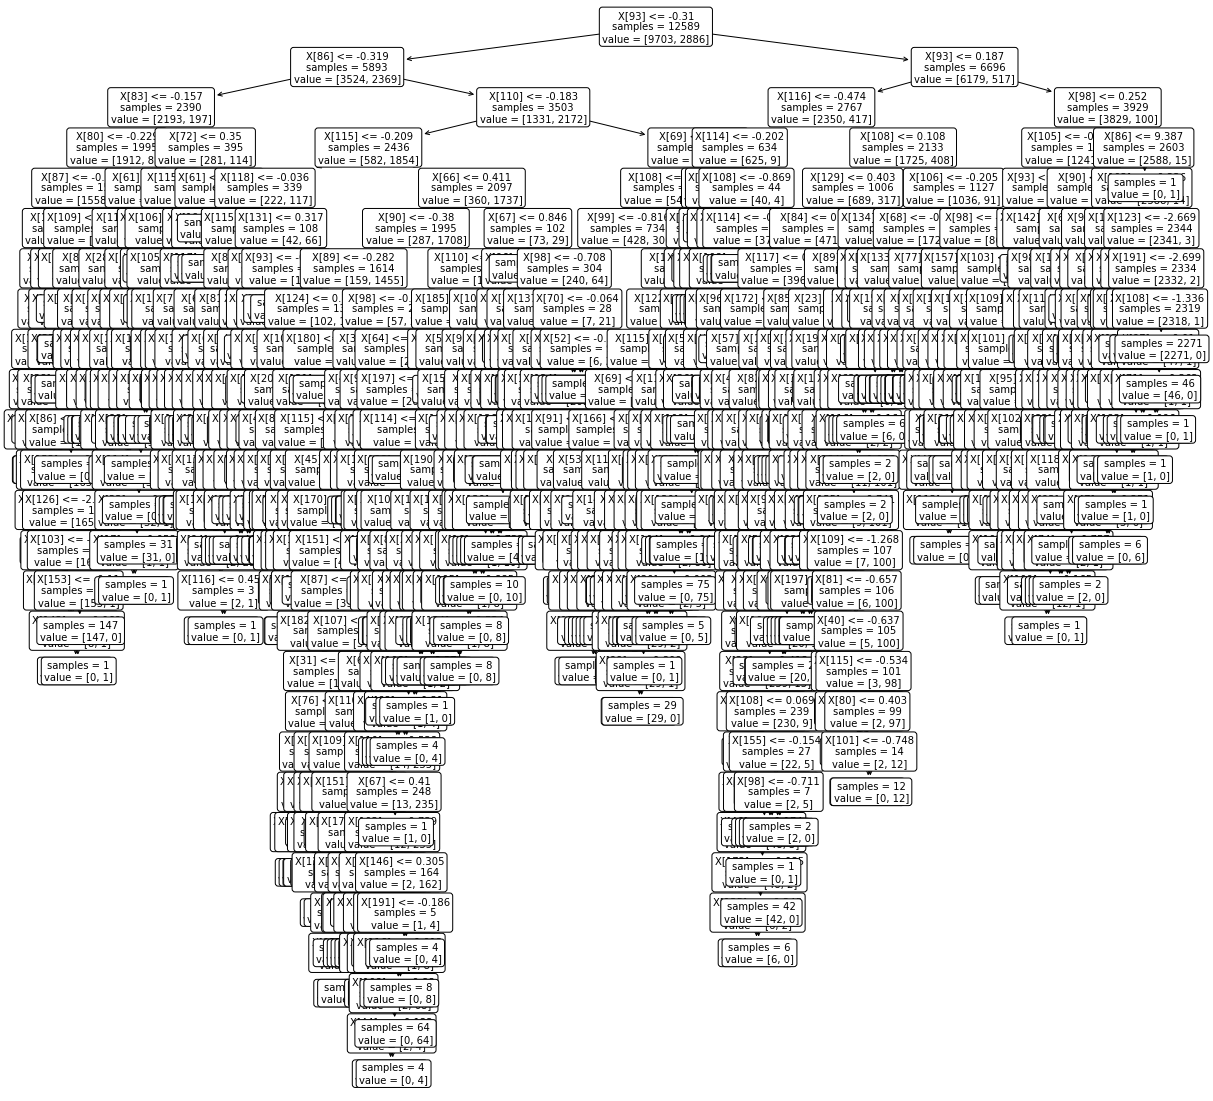

Accuracy percentage:  85.83227445997458 %


In [5]:
DTclassifier = DecisionTreeClassifier()
DTclassifier.fit(training_data_x, training_data_y)

plt.figure(figsize=(20,20))
tree.plot_tree(DTclassifier, fontsize=10, impurity=False, rounded=True)
plt.show()

y_pred = DTclassifier.predict(testing_data_x)
print("Accuracy percentage: ", accuracy_score(testing_data_y, y_pred)*100, "%")

0.8192453779974374
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      1214
           1       0.67      0.75      0.71       360

    accuracy                           0.86      1574
   macro avg       0.80      0.82      0.81      1574
weighted avg       0.86      0.86      0.86      1574



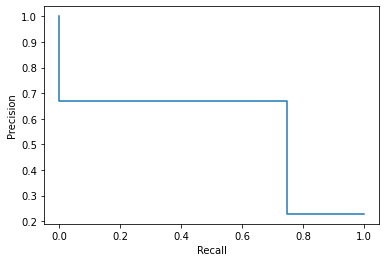

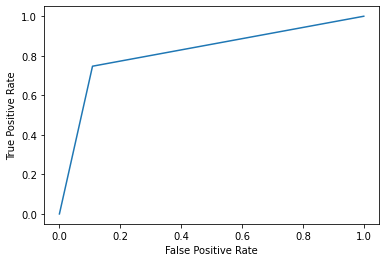

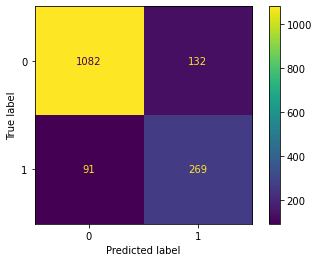

In [9]:
prec, recall, _ = metrics.precision_recall_curve(testing_data_y, y_pred)
metrics.PrecisionRecallDisplay(precision=prec, recall=recall).plot()

fpr, tpr, _ = metrics.roc_curve(testing_data_y, y_pred)
metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

print(metrics.roc_auc_score(testing_data_y, y_pred))

cm = metrics.confusion_matrix(testing_data_y, y_pred)
metrics.ConfusionMatrixDisplay(cm).plot()

print(metrics.classification_report(testing_data_y, y_pred))

In [10]:
with open('tf-models/decision-tree.pkl','wb') as f:
    pickle.dump(DTclassifier,f)

In [11]:
RFclassifier = RandomForestClassifier()
RFclassifier.fit(training_data_x, training_data_y)
y_pred = RFclassifier.predict(testing_data_x)
print("Accuracy percentage: ", accuracy_score(testing_data_y, y_pred)*100, "%")

Accuracy percentage:  91.67725540025413 %


0.8649528647263408
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1214
           1       0.85      0.77      0.81       360

    accuracy                           0.92      1574
   macro avg       0.89      0.86      0.88      1574
weighted avg       0.91      0.92      0.92      1574



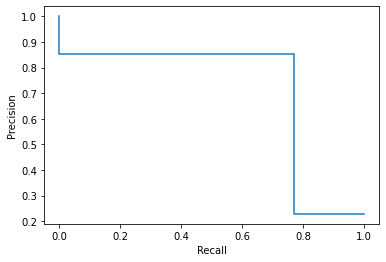

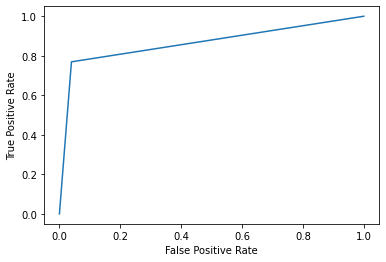

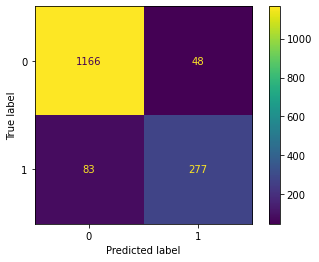

In [12]:
prec, recall, _ = metrics.precision_recall_curve(testing_data_y, y_pred)
metrics.PrecisionRecallDisplay(precision=prec, recall=recall).plot()

fpr, tpr, _ = metrics.roc_curve(testing_data_y, y_pred)
metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

print(metrics.roc_auc_score(testing_data_y, y_pred))

cm = metrics.confusion_matrix(testing_data_y, y_pred)
metrics.ConfusionMatrixDisplay(cm).plot()

print(metrics.classification_report(testing_data_y, y_pred))

In [13]:
with open('tf-models/random-forest.pkl','wb') as f:
    pickle.dump(RFclassifier,f)